In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#salary vs birthplace - CG - Done
#salary vs pts per game - CG - Done
#salary vs NHL GWG - CB - Done
#salary vs Age - CB - Done
#salary vs Penalties - JW - Done
#salary vs overall draft - JW - Done

In [3]:
#read in the csv database 
nhl_df = pd.read_csv("nhlstats.csv", encoding='ISO-8859-1',error_bad_lines=False)

In [4]:
#Display dimension of our dataframe
nhl_df = pd.DataFrame(nhl_df)
nhl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Columns: 169 entries, Player Id to Cap Hit
dtypes: float64(67), int64(75), object(27)
memory usage: 1.1+ MB


In [5]:
#add column for points per game, calculate points per game, and fill cells with answer
nhl_df["Points per Game"] = round(nhl_df["Points"] / nhl_df["GP"],3)

#Normalize Dangerous Shots For / Against data by divding the stat by TOI (Time On Ice)
nhl_df["DSF/TOI"] = nhl_df["DSF"]/ nhl_df["TOI"]
nhl_df["DSA/TOI"] = nhl_df["DSA"]/ nhl_df["TOI"] 

In [6]:
### Run a correlation analysis to identify which measures are related
nhl_corr = nhl_df.corr()
nhl_corr.info()
nhl_corr.head()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, Player Id to DSA/TOI
Columns: 145 entries, Player Id to DSA/TOI
dtypes: float64(145)
memory usage: 165.4+ KB


,Player Id,Year Born,Age,NHL Ht,NHL Wt,NHL DftYr,NHL DftRd,NHL Ovrl,GP,Goals,...,Game Stars 1st,2nd,3rd,TC MGL,TC CHIP,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI
Player Id,1.000000,0.923177,-0.918861,-0.047213,-0.216993,0.979002,-0.108819,-0.118058,-0.323375,-0.167995,...,-0.021553,-0.077091,0.008523,-0.066471,-0.246190,-0.470663,-0.488039,-0.159076,-0.006220,-0.038496
Year Born,0.923177,1.000000,-0.997893,0.022030,-0.159206,0.989494,-0.186099,-0.195961,-0.300333,-0.118334,...,0.024824,-0.031848,0.052021,-0.071356,-0.228259,-0.432352,-0.450084,-0.094574,0.028131,-0.059796
Age,-0.918861,-0.997893,1.000000,-0.021443,0.159004,-0.986621,0.182031,0.191396,0.302580,0.122141,...,-0.023120,0.036931,-0.047259,0.069012,0.224858,0.434848,0.453183,0.097977,-0.026103,0.053628
NHL Ht,-0.047213,0.022030,-0.021443,1.000000,0.720449,-0.004421,-0.190033,-0.193056,0.070231,-0.044073,...,-0.045638,-0.029980,-0.001909,0.005655,0.046570,0.067713,0.077852,-0.077369,-0.023274,-0.048883
NHL Wt,-0.216993,-0.159206,0.159004,0.720449,1.000000,-0.176797,-0.112235,-0.120985,0.126035,-0.014976,...,-0.048448,-0.056698,-0.001042,0.042737,0.054047,0.157932,0.161160,-0.050519,-0.003126,-0.028443


In [7]:
# Only keep variables with Abs(Correlations) > 0.50
#nhl_corr_high = nhl_corr[(abs(nhl_corr) > 0.50).all(axis=1)]
#nhl_corr_high.info()
#nhl_corr.head()

In [8]:
### Loop through Rows x Columns;
### Find indexes

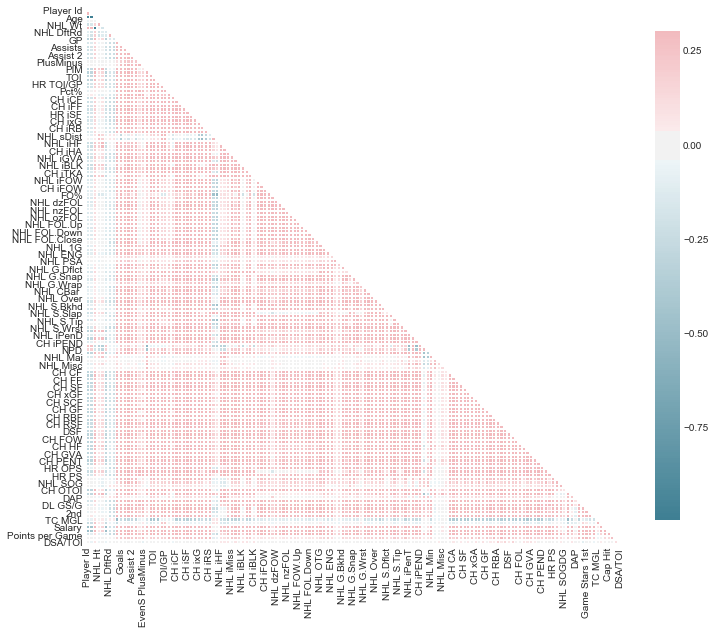

In [9]:
sns.set_style("white")

# Generate a mask for the upper triangle
mask = np.zeros_like(nhl_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(nhl_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [10]:
nhl_df["FWD/DEF"] = nhl_df["Position"]

In [11]:
replace_position = {"D": "D",
                    "C": "F",
                    "RW": "F",
                    "LW": "F",
                    "C/LW": "F",
                    "LW/C": "F",
                    "C/RW": "F",
                    "RW/C": "F",
                    "LW/RW": "F",
                    "RW/LW": "F",
                    "C/LW/RW": "F",
                    "C/RW/LW": "F",
                    "LW/C/RW": "F",
                    "LW/RW/C": "F",
                    "RW/C/LW": "F",
                    "RW/LW/C": "F",
                    "D/RW": "D",
                    "RW/D": "D",
                    "D/LW": "D",
                    "LW/D": "D",
                    "C/D": "D",
                    "D/C": "D",
                    "C/LW/C":"F"}
nhl_df
nhl_df.loc[:,"FWD/DEF"] = nhl_df["FWD/DEF"].map(replace_position)

In [12]:
#confirm the above
nhl_df["FWD/DEF"].value_counts()

F    578
D    296
Name: FWD/DEF, dtype: int64

In [13]:
#Create a data frame for only UFA players (for salary related analysis)
ufa_df = nhl_df.loc[nhl_df["Status"] == "UFA"]

In [14]:
#drop NaN's
ufa_df = ufa_df[ufa_df['Status'].notnull()]
len(ufa_df)

474

In [15]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI,FWD/DEF
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,UFA,575000,575000,0.000,0.000000,0.001946,F
1,8471716,31833,30,Muskegon,MI,USA,USA,74,218,2005.0,...,"Lower body, Knee",932926.83,NTC,UFA,5500000,4250000,0.328,0.000954,0.001188,F
4,8475844,33724,25,Morristown,NJ,USA,USA,72,202,2010.0,...,NaN,NaN,NaN,UFA,625000,625000,0.429,0.001118,0.001491,F
6,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,NaN,NaN,M-NTC,UFA,2800000,2800000,0.159,0.001273,0.001787,D
11,8473573,32287,29,Yaroslavl,NaN,RUS,RUS,76,198,2006.0,...,"Upper body, Lower body",998780.49,NMC,UFA,5750000,4550000,0.703,0.000978,0.001503,F


In [16]:
ufa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 871
Columns: 173 entries, Player Id to FWD/DEF
dtypes: float64(70), int64(75), object(28)
memory usage: 644.3+ KB


In [17]:
#### Salary vs. Birthplace ####
#Calculate number of players per country and display, so to find out how many players are in each country
ufa_df["Nationality"].value_counts()

CAN    241
USA    132
SWE     38
CZE     16
RUS     11
FIN      9
DNK      5
SVK      5
CHE      4
AUT      3
DEU      2
FRA      2
NOR      2
ITA      1
HRV      1
EST      1
SVN      1
Name: Nationality, dtype: int64

In [18]:
country_count = pd.DataFrame(ufa_df['Nationality'].value_counts()).reset_index()
country_count.rename(columns = {"index":"Nationality","Nationality":"Countryman"}, inplace = True)

In [19]:
ufa_df = pd.merge(ufa_df, country_count, on="Nationality")
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,TC CHIP,CF NMC,Status,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI,FWD/DEF,Countryman
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,UFA,575000,575000,0.000,0.000000,0.001946,F,241
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,NaN,M-NTC,UFA,2800000,2800000,0.159,0.001273,0.001787,D,241
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,NaN,NaN,UFA,3700000,3300000,0.683,0.001516,0.000918,F,241
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,NaN,NaN,UFA,800000,750000,0.217,0.001339,0.001384,D,241
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,536585.37,NaN,UFA,5000000,5500000,0.514,0.001024,0.000976,D,241


In [20]:
ufa_df["Country Code"] = ufa_df["Nationality"]

In [21]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,CF NMC,Status,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI,FWD/DEF,Countryman,Country Code
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,UFA,575000,575000,0.000,0.000000,0.001946,F,241,CAN
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,M-NTC,UFA,2800000,2800000,0.159,0.001273,0.001787,D,241,CAN
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,NaN,UFA,3700000,3300000,0.683,0.001516,0.000918,F,241,CAN
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,NaN,UFA,800000,750000,0.217,0.001339,0.001384,D,241,CAN
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,NaN,UFA,5000000,5500000,0.514,0.001024,0.000976,D,241,CAN


In [22]:
#If country is represented by less than or equal to 5 players, then give it a Country Code of "OTH"
ufa_df.loc[ufa_df['Countryman'] <= 5, 'Country Code'] = "OTH"

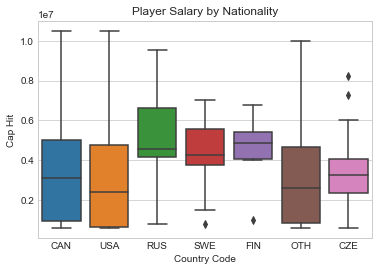

In [23]:
#Display chart (Salary to Country)
sns.set_style("whitegrid")
chart1 = sns.boxplot(x = "Country Code", y = "Cap Hit", data = ufa_df)
plt.title("Player Salary by Nationality")
plt.show()

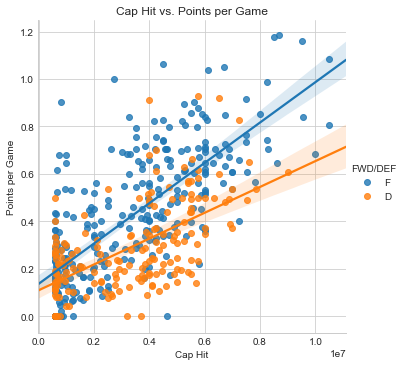

In [24]:
#If we want to look at this chart by team, then we need to drop the slashes "DAL/ANA" to 'ANA'
#Plot the scatterplot 
sns.lmplot(x = "Cap Hit", y = "Points per Game", data = ufa_df, hue="FWD/DEF", fit_reg=True)
plt.title("Cap Hit vs. Points per Game")
plt.show()

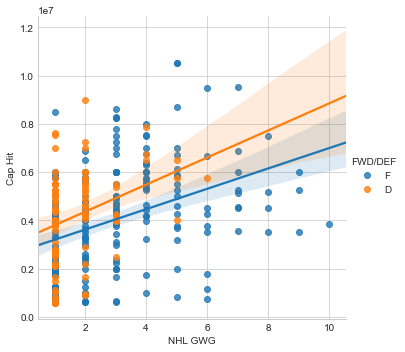

In [25]:
#Create scatterplot for game winning goals to salary

#duplicate the data set and filter out 0 GWG
gwg_df = ufa_df.loc[ufa_df["NHL GWG"] > 0]

#plot the data
sns.lmplot(x = "NHL GWG", y = "Cap Hit", data = gwg_df, hue="FWD/DEF")
plt.show()

#observable trend = Higher paid players seem to score more Game Winning Goals

In [26]:
#List all columns in our ufa_df dataframe
#list(ufa_df)

In [27]:
#Create data frames to hold Defensive and Offensive players
ufa_fwd = ufa_df.loc[ufa_df["FWD/DEF"] == "F"]
ufa_def = ufa_df.loc[ufa_df["FWD/DEF"] == "D"]

In [28]:
#Create data frame of NHL Players who scored at least 1 point
non_zero_pts = nhl_df.loc[nhl_df["Points"] != 0]
non_zero_fwd = ufa_fwd.loc[ufa_fwd["Points"] != 0]
non_zero_def = ufa_def.loc[ufa_def["Points"] != 0]

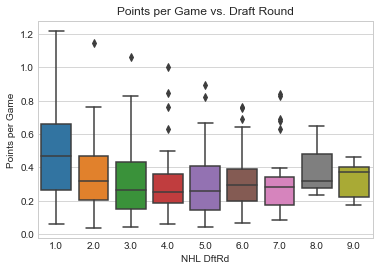

In [29]:
#Create a boxplot, for Forwards, showing Points Per Game vs. Draft Round
sns.set_style("whitegrid")
sns.boxplot(x = "NHL DftRd", y = "Points per Game", data = non_zero_pts)
plt.title("Points per Game vs. Draft Round")
plt.show()

#Observable trend = Higher drafted players produce more points per game, interesting to note the outliers and gems found
#in the latest rounds

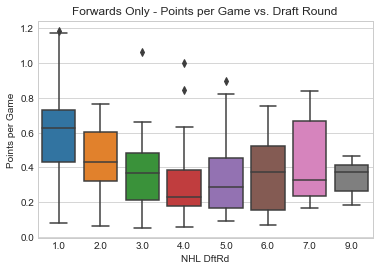

In [30]:
#Create a boxplot, for Forwards only, showing Points Per Game vs. Draft Round
sns.set_style("whitegrid")
sns.boxplot(x = "NHL DftRd", y = "Points per Game", data = non_zero_fwd)
plt.title("Forwards Only - Points per Game vs. Draft Round")
plt.show()

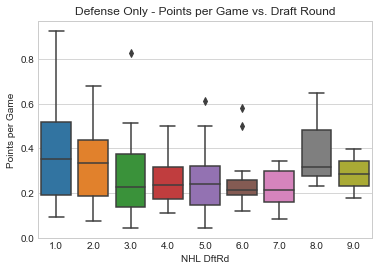

In [31]:
#Create a boxplot, for Defesemen only, showing Points Per Game vs. Draft Round
sns.set_style("whitegrid")
sns.boxplot(x = "NHL DftRd", y = "Points per Game", data = non_zero_def)
plt.title("Defense Only - Points per Game vs. Draft Round")
plt.show()

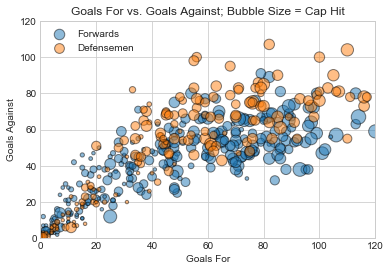

In [32]:
#Forwards vs. Defensemen - Goals For vs. Goals Against vs. Cap Hit
sns.set_style("whitegrid")

fwd_plot = plt.scatter(x = ufa_fwd["CH GF"], y = ufa_fwd["CH GA"], s = ufa_fwd["Cap Hit"]/50000,
            cmap = "Blues", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Forwards")

def_plot = plt.scatter(x = ufa_def["CH GF"], y = ufa_def["CH GA"], s = ufa_def["Cap Hit"]/50000,
            cmap = "Reds", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Defensemen")

plt.figsize = (20, 15)

#Set X / Y Limits
plt.xlim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))
plt.ylim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))

# Add titles (main and on axis)
plt.xlabel("Goals For")
plt.ylabel("Goals Against")
plt.title("Goals For vs. Goals Against; Bubble Size = Cap Hit")

#Create a legend
plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()

In [33]:
#! pip install plotly
import plotly

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go

#plotly.tools.set_credentials_file(username='cjgargano', api_key='7mHALedPo2uS6vOf4arJ')
#print(plotly.__version__)           
plotly.offline.init_notebook_mode() # run at the start of every notebook

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [35]:
trace0 = go.Scatter(
    x = ufa_fwd["CH GF"],
    y = ufa_fwd["CH GA"],
    name = 'FWD',
    mode = 'markers',
    marker = dict(
        size = ufa_fwd["Cap Hit"] / 500000,
        color = 'rgba(0, 75, 141, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 37, 70)'
        )
    )
)

trace1 = go.Scatter(
    x = ufa_def["CH GF"],
    y = ufa_def["CH GA"],
    name = 'DEF',
    mode = 'markers',
    marker = dict(
        size = ufa_def["Cap Hit"] / 500000,
        color = 'rgba(250, 100, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(125, 50, 0)'
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Goals For vs. Goals Against',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='GF_vs_GA')

In [36]:
goals_by_type = [nhl_df["NHL G.Slap"].sum(),
                 nhl_df["NHL G.Snap"].sum(),
                 nhl_df["NHL G.Wrst"].sum(),
                 nhl_df["NHL G.Bkhd"].sum(),
                 nhl_df["NHL G.Wrap"].sum(),
                 nhl_df["NHL G.Dflct"].sum() + nhl_df["NHL G.Tip"].sum()
                ]
goals_by_type

[775, 1046, 3336, 601, 63, 858]

In [37]:
### Plot relationship between goals scored [NHL G (goals), NHL 1G (first goal of game)] was scored (NHL G.: Bkhd, Dflct, 
### Slap, Snap, Tip, Wrap, Wrst)

shot_type = ["Slap", "Snap", "Wrist", "Backhand", "Wraparound", "Deflection"]

goals_by_type = [nhl_df["NHL G.Slap"].sum(),
                 nhl_df["NHL G.Snap"].sum(),
                 nhl_df["NHL G.Wrst"].sum(),
                 nhl_df["NHL G.Bkhd"].sum(),
                 nhl_df["NHL G.Wrap"].sum(),
                 nhl_df["NHL G.Dflct"].sum() + nhl_df["NHL G.Tip"].sum()
                ]

shots_by_type = [nhl_df["NHL S.Slap"].sum(),
                 nhl_df["NHL S.Snap"].sum(),
                 nhl_df["NHL S.Wrst"].sum(),
                 nhl_df["NHL S.Bkhd"].sum(),
                 nhl_df["NHL S.Wrap"].sum(),
                 nhl_df["NHL S.Dflct"].sum() + nhl_df["NHL S.Tip"].sum()
                ]

shot_analysis = pd.DataFrame({"Type": shot_type,
                             "Goals": goals_by_type,
                             "Shots": shots_by_type})

shot_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Goals    6 non-null int64
Shots    6 non-null int64
Type     6 non-null object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [38]:
shot_analysis["ScorePct"] = round(shot_analysis["Goals"] / shot_analysis["Shots"], 4)
shot_analysis.head()

,Goals,Shots,Type,ScorePct
0,775,12633,Slap,0.0613
1,1046,11858,Snap,0.0882
2,3336,38264,Wrist,0.0872
3,601,5974,Backhand,0.1006
4,63,775,Wraparound,0.0813


In [39]:
#Format numbers in table!
#shot_analysis["Goals"] = shot_analysis["Goals"].map("{:,}".format)
#shot_analysis["Shots"] = shot_analysis["Shots"].map("{:,}".format)
#shot_analysis["ScorePct"] = shot_analysis["ScorePct"].map("{:.2%}".format)
#shot_analysis.head()

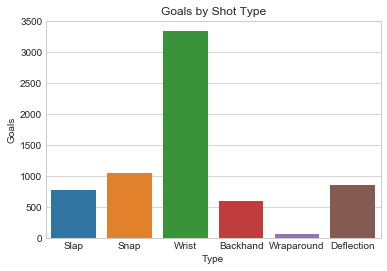

In [40]:
#Create a bar plot of Goals / Shots by Type
goal_type_plot = sns.barplot(x = "Type", y = "Goals", data = shot_analysis, ci = 0)
plt.title("Goals by Shot Type")
plt.show()

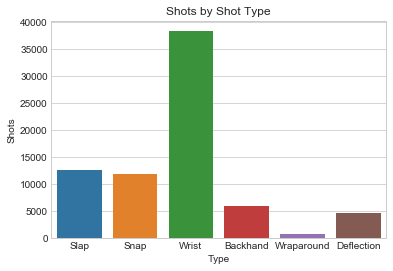

In [41]:
#Create a bar plot of Shots / Shots by Type
shot_type_plot = sns.barplot(x = "Type", y = "Shots", data = shot_analysis, ci = 0)
plt.title("Shots by Shot Type")
plt.show()

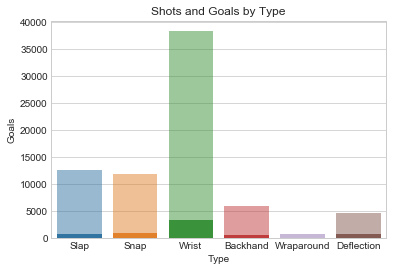

In [42]:
#Create a bar plot of Scoring Percentage by Type
shot_plot = sns.barplot(x = "Type", y = "Shots", data = shot_analysis, ci = 0, alpha = 0.5)
goal_plot = sns.barplot(x = "Type", y = "Goals", data = shot_analysis, ci = 0)
plt.title("Shots and Goals by Type")
plt.show()

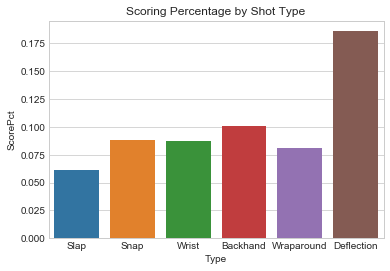

In [43]:
#Create a bar plot of Scoring Percentage by Type
#Scoring Percentage = # Goals / # Shots

# Scoring percentage show that deflections score at a noticably higher rate than the other shot types.
# This indicates that the last second direct change of the shot trajectory is very difficult for a goalie to stop.

score_pct_plot = sns.barplot(x = "Type", y = "ScorePct", data = shot_analysis, ci = 0)
plt.title("Scoring Percentage by Shot Type")
plt.show()

In [44]:
### Analyze Dangerous Shots For vs. Dangerous Shots Against
### By Position: team defense spend as a percentage of cap hit

In [45]:
#Create data frames to hold Defensive and Offensive players for the entire nhl data frame
nhl_fwd = nhl_df.loc[nhl_df["FWD/DEF"] == "F"]
nhl_def = nhl_df.loc[nhl_df["FWD/DEF"] == "D"]

In [77]:
#Create data frame for all players grouped by NHL Teams 
nhl_team = pd.DataFrame(nhl_df.groupby("LastTeam").sum()).reset_index()
nhl_team.head()

,LastTeam,Player Id,Year Born,Age,NHL Ht,NHL Wt,NHL DftYr,NHL DftRd,NHL Ovrl,GP,...,Game Stars 1st,2nd,3rd,TC MGL,TC CHIP,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI
0,ANA,262718470,1023429,841,2282,6244,58249.0,79.0,2088.0,1382,...,35.0,43.0,33.0,240.0,9710715.04,77362500,77882087,8.351,0.041242,0.032577
1,ARI,211881684,838364,640,1827,4963,46231.0,47.0,1117.0,1222,...,18.0,27.0,24.0,136.0,3020323.69,42767759,44358592,8.019,0.030618,0.039456
2,BOS,245773645,957588,787,2110,5745,46189.0,68.0,1880.0,1458,...,24.0,38.0,39.0,178.0,4841727.66,67732500,65316668,8.575,0.036274,0.025463
3,BUF,279696904,1104403,856,2416,6717,54269.0,73.0,1792.0,1433,...,26.0,26.0,31.0,312.0,11021607.08,77602500,74004107,8.946,0.040051,0.039377
4,CAR,220387622,878709,647,1888,5083,42225.0,47.0,1066.0,1344,...,27.0,35.0,36.0,84.0,2084065.07,42530000,42036251,8.723,0.041620,0.042453


In [78]:
#Create data frame for Forwards grouped by NHL Teams 
nhl_team_f = pd.DataFrame(nhl_fwd.groupby("LastTeam").sum()).reset_index()
nhl_team_f["F_Cap"] = nhl_team_f["Cap Hit"] / nhl_team["Cap Hit"]
nhl_team_f.head()

,LastTeam,Player Id,Year Born,Age,NHL Ht,NHL Wt,NHL DftYr,NHL DftRd,NHL Ovrl,GP,...,2nd,3rd,TC MGL,TC CHIP,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI,F_Cap
0,ANA,161014161,623257,527,1391,3782,34133.0,43.0,1115.0,889,...,37.0,20.0,77.0,2470285.22,50380000,47318672,5.922,0.024011,0.020930,0.607568
1,ARI,135608326,540488,398,1165,3159,30154.0,35.0,844.0,769,...,23.0,15.0,116.0,2673067.59,21342759,21645259,6.067,0.019723,0.024492,0.487961
2,BOS,161030659,630960,505,1373,3723,30127.0,42.0,1163.0,966,...,33.0,30.0,116.0,2751280.48,46097500,41527084,6.598,0.022539,0.016182,0.635781
3,BUF,177989788,705574,536,1524,4212,38188.0,52.0,1290.0,941,...,25.0,28.0,198.0,6014217.59,50875000,46497917,7.028,0.025011,0.024216,0.628315
4,CAR,161049352,639993,479,1372,3660,30153.0,33.0,747.0,909,...,24.0,31.0,61.0,1517804.93,32395000,32513751,6.866,0.030865,0.032205,0.773469


In [79]:
#Create data frame for Defensemen grouped by NHL Teams 
nhl_team_d = pd.DataFrame(nhl_def.groupby("LastTeam").sum()).reset_index()
nhl_team_d["D_Cap"] = nhl_team_d["Cap Hit"] / nhl_team["Cap Hit"]
nhl_team_d.head()

,LastTeam,Player Id,Year Born,Age,NHL Ht,NHL Wt,NHL DftYr,NHL DftRd,NHL Ovrl,GP,...,2nd,3rd,TC MGL,TC CHIP,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI,D_Cap
0,ANA,101704309,400172,314,891,2462,24116.0,36.0,973.0,493,...,6.0,13.0,163.0,7240429.82,26982500,30563415,2.429,0.017232,0.011646,0.392432
1,ARI,76273358,297876,242,662,1804,16077.0,12.0,273.0,453,...,4.0,9.0,20.0,347256.10,21425000,22713333,1.952,0.010895,0.014964,0.512039
2,BOS,84742986,326628,282,737,2022,16062.0,26.0,717.0,492,...,5.0,9.0,62.0,2090447.18,21635000,23789584,1.977,0.013735,0.009281,0.364219
3,BUF,101707116,398829,320,892,2505,16081.0,21.0,502.0,492,...,1.0,3.0,114.0,5007389.49,26727500,27506190,1.918,0.015040,0.015161,0.371685
4,CAR,59338270,238716,168,516,1423,12072.0,14.0,319.0,435,...,11.0,5.0,23.0,566260.14,10135000,9522500,1.857,0.010755,0.010249,0.226531


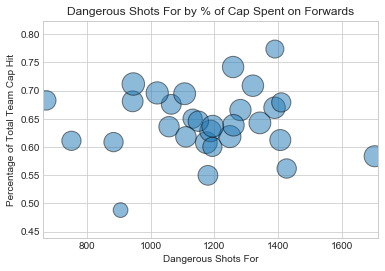

In [68]:
#Forwards Only: High Danger Shots For by % of Total team Cap Hit
sns.set_style("whitegrid")

f1 = plt.scatter(x = nhl_team_f["DSF"], y = nhl_team_f["F_Cap"], s = nhl_team_f["Cap Hit"]/100000,
            cmap = "Blues", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Forwards")

plt.figsize = (20, 15)

#Set X / Y Limits
plt.xlim(min(nhl_team_f["DSF"]) - 10, max(nhl_team_f["DSF"]) + 10)
plt.ylim(min(nhl_team_f["F_Cap"]) - 0.05, max(nhl_team_f["F_Cap"]) + 0.05)

# Add titles (main and on axis)
plt.xlabel("Dangerous Shots For")
plt.ylabel("Percentage of Total Team Cap Hit")
plt.title("Dangerous Shots For by % of Cap Spent on Forwards")

#Create a legend
#plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()

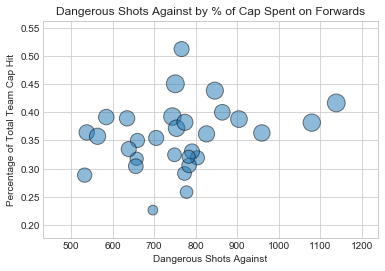

In [69]:
#Defense Only: High Danger Shots Against by % of Total team Cap Hit
sns.set_style("whitegrid")

d1 = plt.scatter(x = nhl_team_d["DSA"], y = nhl_team_d["D_Cap"], s = nhl_team_d["Cap Hit"]/100000,
            cmap = "Reds", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Defense")

plt.figsize = (20, 15)

#Set X / Y Limits
plt.xlim(min(nhl_team_d["DSA"]) - 100, max(nhl_team_d["DSA"]) + 100)
plt.ylim(min(nhl_team_d["D_Cap"]) - 0.05, max(nhl_team_d["D_Cap"]) + 0.05)

# Add titles (main and on axis)
plt.xlabel("Dangerous Shots Against")
plt.ylabel("Percentage of Total Team Cap Hit")
plt.title("Dangerous Shots Against by % of Cap Spent on Forwards")

#Create a legend
#plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()

In [ ]:
#Forwards Only: High Danger Shots For by % of Total team Cap Hit
sns.set_style("whitegrid")

f1 = plt.scatter(x = nhl_team_f["F_Cap"], y = nhl_team_f["DSF/TOI"], s = nhl_team_f["Cap Hit"]/50000,
            cmap = "Blues", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Forwards")

plt.figsize = (20, 15)

#Set X / Y Limits
plt.xlim(0, 1)
plt.ylim(0, max(nhl_team_f["DSF/TOI"]))

# Add titles (main and on axis)
plt.xlabel("Percentage of Total Team Cap Hit")
plt.ylabel("Dangerous Shots For / TOI")
plt.title("Dangerous Shots For by % of Cap Spent on Forwards")

#Create a legend
#plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()

In [154]:
temp1 = pd.DataFrame({"ID" : range(1,31),
                      "Team": nhl_team_f["LastTeam"],
                      "Cap_Perc": nhl_team_f["F_Cap"],
                      "Position": "F"
                             })

temp2 = pd.DataFrame({"ID" : range(1,31),
                      "Team": nhl_team_d["LastTeam"],
                      "Cap_Perc": nhl_team_d["D_Cap"],
                      "Position": "D"
                             })

position_caps = temp1.append(temp2)
position_caps.head()

,Cap_Perc,ID,Position,Team
0,0.607568,1,F,ANA
1,0.487961,2,F,ARI
2,0.635781,3,F,BOS
3,0.628315,4,F,BUF
4,0.773469,5,F,CAR


In [155]:
position_caps["Division"] = [
    "Pacific", "Pacific", "Atlantic", "Atlantic", "Metropolitan", "Metropolitan",
    "Pacific", "Central", "Central", "Central", "Atlantic", "Pacific", 
    "Atlantic", "Pacific", "Central", "Atlantic", "Metropolitan", "Central",
    "Metropolitan", "Metropolitan", "Atlantic", "Metropolitan", "Metropolitan", "Pacific",
    "Central", "Atlantic", "Atlantic", "Pacific", "Central", "Metropolitan",
    
    "Pacific", "Pacific", "Atlantic", "Atlantic", "Metropolitan", "Metropolitan",
    "Pacific", "Central", "Central", "Central", "Atlantic", "Pacific", 
    "Atlantic", "Pacific", "Central", "Atlantic", "Metropolitan", "Central",
    "Metropolitan", "Metropolitan", "Atlantic", "Metropolitan", "Metropolitan", "Pacific",
    "Central", "Atlantic", "Atlantic", "Pacific", "Central", "Metropolitan"  

]

#position_caps = position_caps.sort_values(["Division", "Team"])
position_caps.head()


,Cap_Perc,ID,Position,Team,Division
0,0.607568,1,F,ANA,Pacific
1,0.487961,2,F,ARI,Pacific
2,0.635781,3,F,BOS,Atlantic
3,0.628315,4,F,BUF,Atlantic
4,0.773469,5,F,CAR,Metropolitan


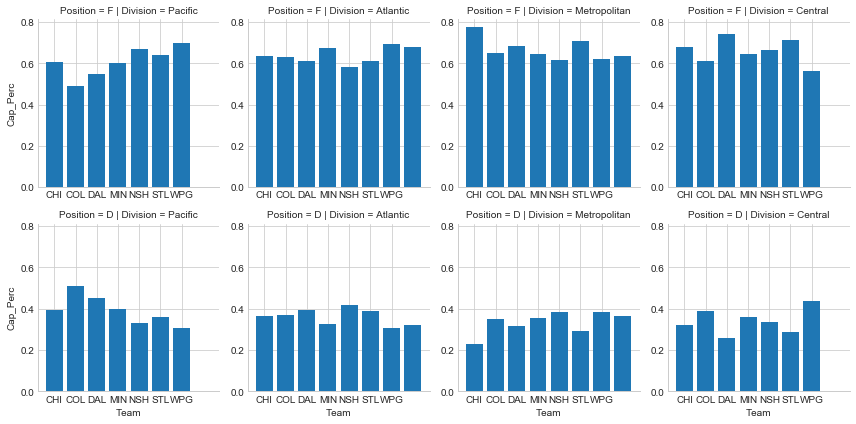

In [156]:
g = sns.FacetGrid(position_caps, col = "Division",  row="Position")
g = g.map(plt.bar, "Team", "Cap_Perc")
plt.show()

In [106]:
metro_caps = position_caps[position_caps.loc[:,"Division"] == "Metropolitan"]
atlantic_caps = position_caps[position_caps.loc[:,"Division"] == "Atlantic"]
central_caps = position_caps[position_caps.loc[:,"Division"] == "Central"]
pacific_caps = position_caps[position_caps.loc[:,"Division"] == "Pacific"]

In [112]:
metro_caps

,D_Cap,F_Cap,Team,Division
4,0.226531,0.773469,CAR,Metropolitan
5,0.349989,0.650011,CBJ,Metropolitan
16,0.317523,0.682477,N.J,Metropolitan
18,0.354419,0.645581,NYI,Metropolitan
19,0.382169,0.617831,NYR,Metropolitan
21,0.291486,0.708514,PHI,Metropolitan
22,0.381639,0.618361,PIT,Metropolitan
29,0.363276,0.636724,WSH,Metropolitan


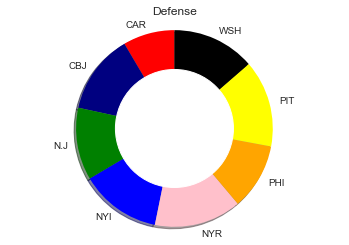

In [125]:
#Pie Charts of Salary Spend by Division - Metropolitan, Defense
labels = "CAR", "CBJ", "N.J", "NYI", "NYR", "PHI", "PIT", "WSH"
def_sizes = metro_caps["D_Cap"]
fwd_sizes = metro_caps["F_Cap"]
colors = ["red", "navy", "green", "blue", "pink", "orange", "yellow", "black"]

#Create Donut Chart
fig1, ax1 = plt.subplots()
ax1.pie(def_sizes, labels = labels, shadow = True, startangle = 90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Defense")

 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

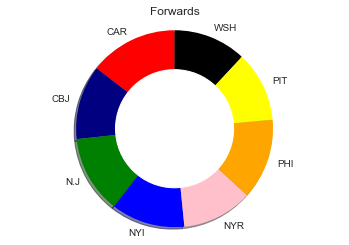

In [126]:
#Pie Charts of Salary Spend by Division - Metropolitan, Defense
labels = "CAR", "CBJ", "N.J", "NYI", "NYR", "PHI", "PIT", "WSH"
def_sizes = metro_caps["D_Cap"]
fwd_sizes = metro_caps["F_Cap"]
colors = ["red", "navy", "green", "blue", "pink", "orange", "yellow", "black"]

#Create Donut Chart
fig1, ax1 = plt.subplots()
ax1.pie(fwd_sizes, labels = labels, shadow = True, startangle = 90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Forwards")
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

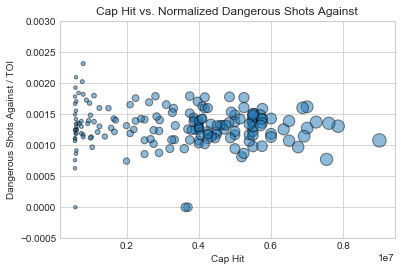

In [67]:
#Forwards vs. Defensemen - Goals For vs. Goals Against vs. Cap Hit
sns.set_style("whitegrid")

def_dsfa = plt.scatter(x = ufa_def["Cap Hit"], y = ufa_def["DSA/TOI"], s = ufa_def["Cap Hit"]/50000,
            cmap = "Reds", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Defensemen")

plt.figsize = (20, 15)

#Set X / Y Limits
#plt.ylim(-0.001, max(ufa_def["DSA/TOI"])+0.0005)
plt.ylim(-0.0005, 0.003)

# Add titles (main and on axis)
plt.xlabel("Cap Hit")
plt.ylabel("Dangerous Shots Against / TOI")
plt.title("Cap Hit vs. Normalized Dangerous Shots Against")

#Create a legend
#plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()
